In [61]:
#Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load the dataset
df=pd.read_csv('Cricket_asiacup.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("First few rows of the dataset:")
print(df.head())

Dataset Shape: (254, 20)
First few rows of the dataset:
        Team   Opponent Format   Ground  Year  Toss Selection  Run Scored  \
0   Pakistan  Sri Lanka    ODI  Sharjah  1984  Lose   Batting       187.0   
1  Sri Lanka   Pakistan    ODI  Sharjah  1984   Win   Bowling       190.0   
2      India  Sri Lanka    ODI  Sharjah  1984   Win   Bowling        97.0   
3  Sri Lanka      India    ODI  Sharjah  1984  Lose   Batting        96.0   
4      India   Pakistan    ODI  Sharjah  1984   Win   Batting       188.0   

   Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
0          9.0    9.0    3.0    21.0      4.06                52.04   
1          5.0   11.0    1.0    26.0      4.36                68.51   
2          0.0    9.0    0.0    14.0      4.47                60.48   
3         10.0    7.0    0.0     8.0      2.34                25.74   
4          4.0   13.0    3.0    17.0      4.08                60.21   

   Highest Score  Wicket Taken  Given Extras  Highest 

Missing values in each column:
Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       0
dtype: int64


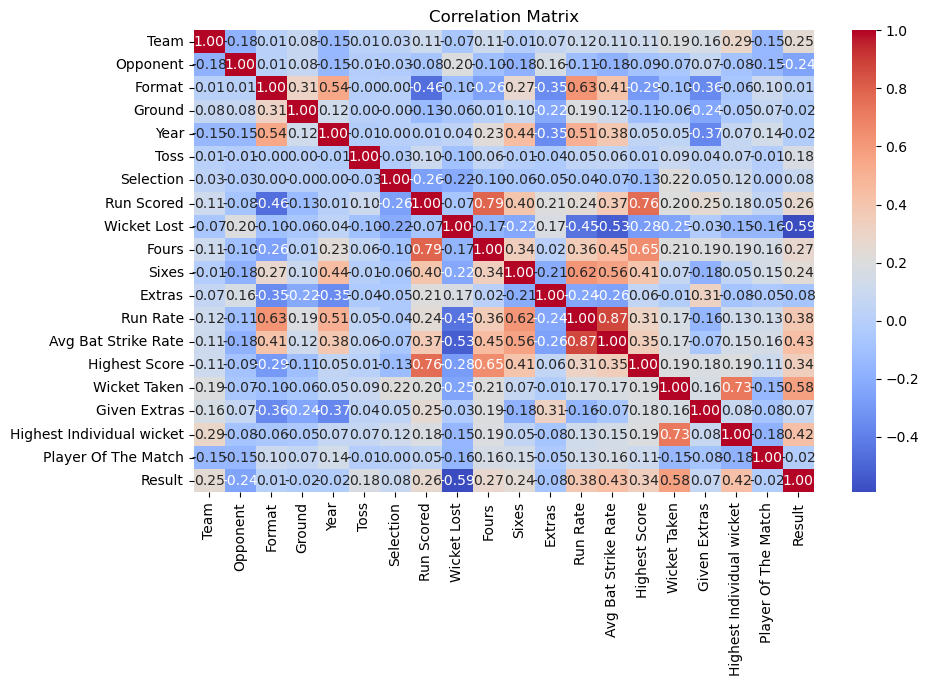

Training set size: 177 | Validation set size: 38 | Test set size: 39


In [65]:
# Data Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill missing values (if any)
df.ffill(inplace=True)  # Use forward fill to handle missing values

# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Splitting data into features and target
X = df.drop('Result', axis=1)  # Replace 'Result' with the column name indicating the outcome
y = df['Result']

# Splitting into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} | Validation set size: {X_val.shape[0]} | Test set size: {X_test.shape[0]}")


In [67]:
# Random Forest Classifier Implementation
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Evaluate on test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

Validation Accuracy: 89.47%
Test Accuracy: 71.79%

Classification Report:
              precision    recall  f1-score   support

           2       0.72      0.76      0.74        17
           3       0.00      0.00      0.00         1
           4       0.75      0.75      0.75        20
           5       0.00      0.00      0.00         1

    accuracy                           0.72        39
   macro avg       0.37      0.38      0.37        39
weighted avg       0.70      0.72      0.71        39



In [87]:
# Remove classes with only one sample
class_counts = y_train.value_counts()
classes_to_remove = class_counts[class_counts == 1].index

# Filter out rows that belong to these classes
X_train_filtered = X_train[~y_train.isin(classes_to_remove)]
y_train_filtered = y_train[~y_train.isin(classes_to_remove)]

# Proceed with Grid Search using StratifiedShuffleSplit
stratified_cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=stratified_cv,  # StratifiedShuffleSplit
    scoring='accuracy',
    verbose=1
)

# Fit the model
grid_search.fit(X_train_filtered, y_train_filtered)

# Display best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate on the validation set
y_val_best_pred = best_model.predict(X_val)
best_validation_accuracy = accuracy_score(y_val, y_val_best_pred)
print(f"Best Validation Accuracy: {best_validation_accuracy * 100:.2f}%")


Fitting 1 folds for each of 27 candidates, totalling 27 fits
Error during GridSearchCV fitting: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Please check the class distribution in y_train for imbalance issues.


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Final Test Accuracy with Tuned Model: 76.92%

Classification Report with Tuned Model:
              precision    recall  f1-score   support

           2       0.75      0.88      0.81        17
           3       0.00      0.00      0.00         1
           4       0.83      0.75      0.79        20
           5       0.00      0.00      0.00         1

    accuracy                           0.77        39
   macro avg       0.40      0.41      0.40        39
weighted avg       0.75      0.77      0.76        39



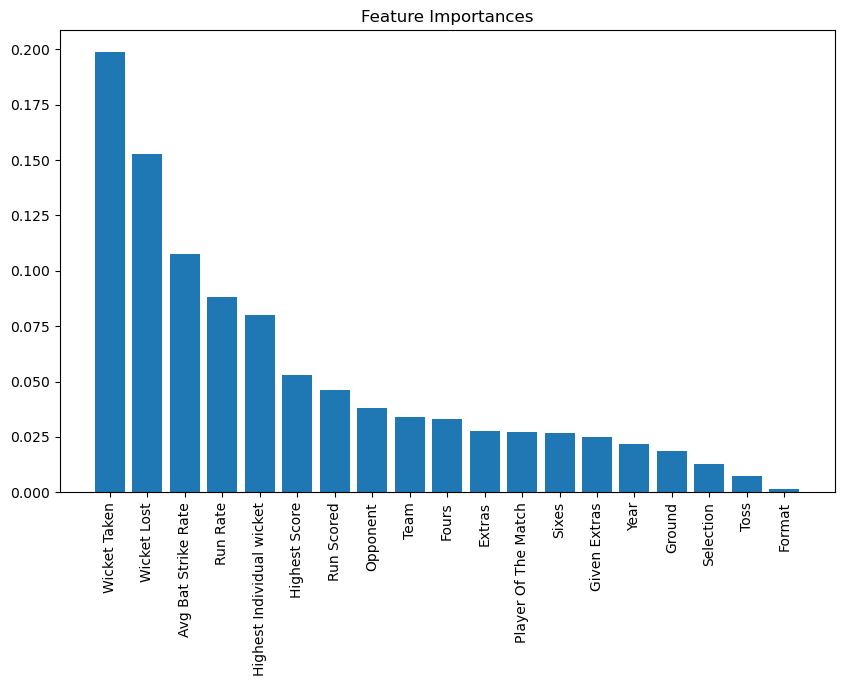

In [73]:

# Test with the tuned model
y_test_best_pred = best_model.predict(X_test)
final_test_accuracy = accuracy_score(y_test, y_test_best_pred)
print(f"Final Test Accuracy with Tuned Model: {final_test_accuracy * 100:.2f}%")

# Use zero_division to handle undefined metrics
print("\nClassification Report with Tuned Model:")
print(classification_report(y_test, y_test_best_pred, zero_division=0))

# Feature importance visualization
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()